In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier

In [2]:
# Cargar los datos
df = pd.read_csv('../Datos/dataset_modelo.csv')

df['Edad del Hombre'] = df['Edad del Hombre'].replace(999, np.nan)
df['Edad de la Mujer'] = df['Nacionalidad de la Mujer'].replace(999, np.nan)
df['Escolaridad del Hombre'] = df['Escolaridad del Hombre'].replace(9, np.nan)
df['Escolaridad de la Mujer'] = df['Escolaridad de la Mujer'].replace(9, np.nan)

# Seleccionar las características para el modelo
selected_features = [
    "Ano Ocurrencia", 
    "Departamento de Ocurrencia", 
    "Edad del Hombre", 
    "Edad de la Mujer",
    "Escolaridad del Hombre",
    "Escolaridad de la Mujer"
]

# Preparar los datos
X = df[selected_features].copy()
y = df['divorcio']

# Manejar valores faltantes en características numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
X[numeric_features] = imputer.fit_transform(X[numeric_features])

# Manejar valores faltantes en características categóricas
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features] = X[categorical_features].fillna('None')

# Objetos de preprocesamiento para pipeline de modelos
preprocesador_categorico = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocesador_numerico = StandardScaler()

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

C:\Users\50250\AppData\Local\Temp\ipykernel_30800\4029805767.py:2: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datos/dataset_modelo.csv')


In [3]:
# Generación de preprocesador
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico, categorical_features),
    ('standard_scaler',preprocesador_numerico, numeric_features)
])

## Prueba Modelo 1

In [4]:
rf_classifier = make_pipeline(preprocesador, RandomForestClassifier(n_estimators=100, random_state=42))

start = time.time()
rf_classifier.fit(X_train, y_train)
tiempo_entrenamiento_rf = time.time() - start

# Evaluar el modelo
y_predRF = rf_classifier.predict(X_test)

In [5]:
print("Accuracy Random Forest:", accuracy_score(y_test, y_predRF))

Accuracy Random Forest: 0.9489091731985437


In [6]:
print("Reporte de clasificación para Random Forest:\n", classification_report(y_test, y_predRF))

Reporte de clasificación para Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    234531
           1       0.64      0.36      0.46     15142

    accuracy                           0.95    249673
   macro avg       0.80      0.67      0.72    249673
weighted avg       0.94      0.95      0.94    249673



<Figure size 1000x600 with 0 Axes>

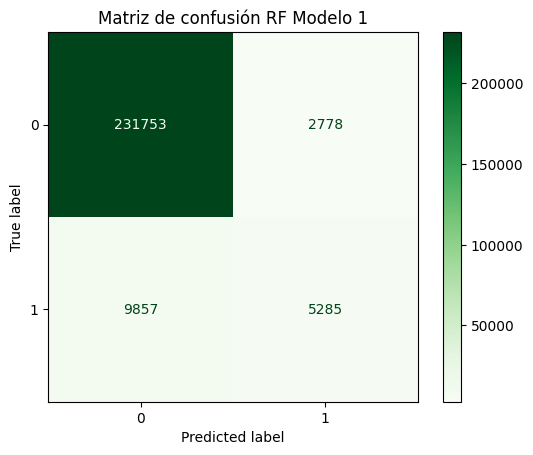

In [14]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_predRF)
disp1 = ConfusionMatrixDisplay(cm)
disp1.plot(cmap="Greens")
plt.title("Matriz de confusión RF Modelo 1")

plt.show()

In [8]:
print("Tiempo de entrenamiento (Random Forest):", tiempo_entrenamiento_rf, "s")

Tiempo de entrenamiento (Random Forest): 43.974199056625366 s


## Prueba Modelo 2

In [9]:
rf_classifier = make_pipeline(preprocesador, 
                              RandomForestClassifier(n_estimators=100, 
                                                     random_state=42,
                                                     max_depth=20))

start = time.time()
rf_classifier.fit(X_train, y_train)
tiempo_entrenamiento_rf = time.time() - start

# Evaluar el modelo
y_predRF = rf_classifier.predict(X_test)

In [10]:
print("Accuracy Random Forest:", accuracy_score(y_test, y_predRF))

Accuracy Random Forest: 0.9493938070996863


In [11]:
print("Reporte de clasificación para Random Forest:\n", classification_report(y_test, y_predRF))

Reporte de clasificación para Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    234531
           1       0.66      0.35      0.46     15142

    accuracy                           0.95    249673
   macro avg       0.81      0.67      0.71    249673
weighted avg       0.94      0.95      0.94    249673



<Figure size 1000x600 with 0 Axes>

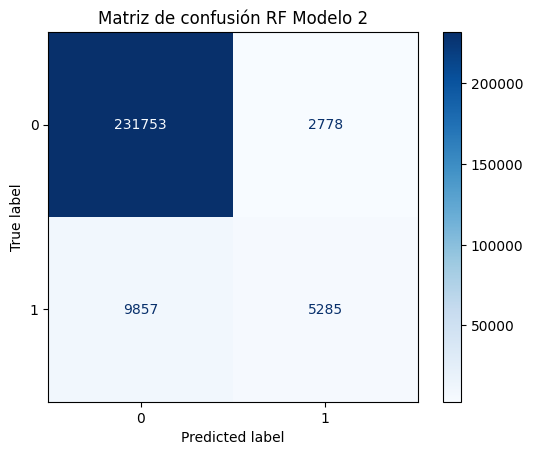

In [12]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_predRF)
disp2 = ConfusionMatrixDisplay(cm)
disp2.plot(cmap="Blues")
plt.title("Matriz de confusión RF Modelo 2")

plt.show()

In [13]:
print("Tiempo de entrenamiento (Random Forest):", tiempo_entrenamiento_rf, "s")

Tiempo de entrenamiento (Random Forest): 43.68249535560608 s


## Prueba Modelo 3

In [15]:
rf_classifier = make_pipeline(preprocesador, 
                              RandomForestClassifier(n_estimators=75,   # Menor cantidad de árboles
                                                     random_state=42,
                                                     min_samples_leaf=1,  # Menor regularización posible
                                                     max_depth=None ))   # Sin límite de profundidad)

start = time.time()
rf_classifier.fit(X_train, y_train)
tiempo_entrenamiento_rf = time.time() - start

# Evaluar el modelo
y_predRF = rf_classifier.predict(X_test)

In [16]:
print("Accuracy Random Forest:", accuracy_score(y_test, y_predRF))

Accuracy Random Forest: 0.9489572360647727


In [17]:
print("Reporte de clasificación para Random Forest:\n", classification_report(y_test, y_predRF))

Reporte de clasificación para Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    234531
           1       0.64      0.36      0.46     15142

    accuracy                           0.95    249673
   macro avg       0.80      0.67      0.72    249673
weighted avg       0.94      0.95      0.94    249673



<Figure size 1000x600 with 0 Axes>

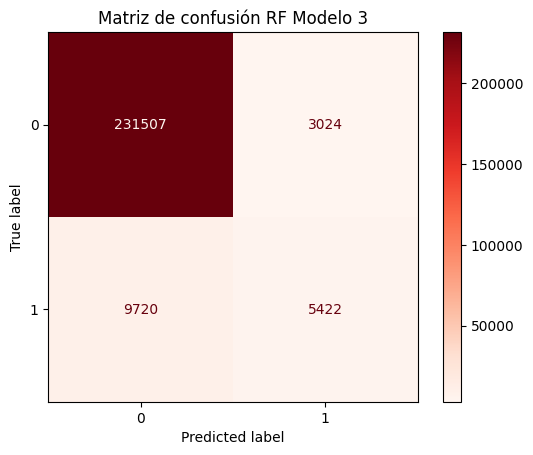

In [18]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_predRF)
disp2 = ConfusionMatrixDisplay(cm)
disp2.plot(cmap="Reds")
plt.title("Matriz de confusión RF Modelo 3")

plt.show()